## This notebook demonstrates the process of building and training a Convolutional Neural Network (CNN) using the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 different classes.

In [84]:
# Importing necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [85]:
# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [86]:
# Checking the shape of the training data
x_train.shape

(50000, 32, 32, 3)

In [87]:
# Visualizing a single image from the dataset
single_image = x_train[30]
single_image

array([[[126, 118, 110],
        [122, 115, 108],
        [126, 119, 111],
        ...,
        [124, 118, 106],
        [120, 114, 102],
        [117, 111,  99]],

       [[122, 115, 107],
        [119, 112, 104],
        [121, 114, 106],
        ...,
        [124, 118, 106],
        [122, 116, 104],
        [117, 111,  99]],

       [[122, 115, 107],
        [121, 114, 106],
        [121, 114, 106],
        ...,
        [126, 120, 108],
        [123, 117, 105],
        [121, 115, 103]],

       ...,

       [[126, 118, 107],
        [126, 118, 107],
        [128, 120, 109],
        ...,
        [133, 125, 114],
        [122, 114, 103],
        [114, 106,  95]],

       [[125, 117, 106],
        [126, 118, 107],
        [127, 119, 108],
        ...,
        [128, 120, 109],
        [121, 113, 102],
        [114, 106,  95]],

       [[123, 115, 104],
        [123, 115, 104],
        [126, 118, 107],
        ...,
        [128, 119, 109],
        [126, 118, 107],
        [121, 113, 102]]

In [88]:
# Checking the shape of the single image
single_image.shape

(32, 32, 3)

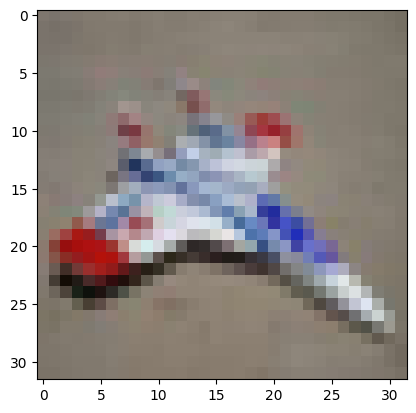

In [89]:
# Displaying the single image
plt.imshow(single_image)

In [90]:
# Checking the shape of y_train and y_test
y_train
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [91]:
# Converting y_train and y_test to categorical format
y_train.shape
y_example = to_categorical(y_train)
y_example
y_example.shape
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [92]:
# Checking the maximum and minimum pixel values of the single image
single_image.max()
single_image.min()

5

In [93]:
# Normalizing pixel values of the images
x_train = x_train / 255
x_test = x_test / 255

In [94]:
# Checking the maximum and minimum pixel values of the normalized image
scaled_image = x_train[30]
scaled_image.max()
scaled_image.min()

0.0196078431372549

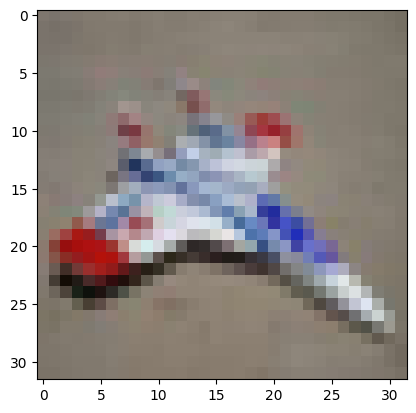

In [95]:
# Displaying the normalized image
plt.imshow(scaled_image)

In [96]:
x_train.shape

(50000, 32, 32, 3)

In [97]:
# Model definition
model = Sequential()

In [98]:
# Model Architecture
model = Sequential()

# Convolutional layers with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flattening the output for the dense layers
model.add(Flatten())

# Dense layers with ReLU activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer with Softmax activation
model.add(Dense(10, activation='softmax'))

In [99]:
# model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [100]:
# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [101]:
# Training the model
model.fit(x_train, y_cat_train, epochs=13)

Epoch 1/13
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5956 - accuracy: 0.4168
Epoch 2/13
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1649 - accuracy: 0.5898
Epoch 3/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9883 - accuracy: 0.6553
Epoch 4/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8770 - accuracy: 0.6951
Epoch 5/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7944 - accuracy: 0.7266
Epoch 6/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7279 - accuracy: 0.7482
Epoch 7/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6728 - accuracy: 0.7684
Epoch 8/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6250 - accuracy: 0.7842
Epoch 9/13
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5891 - accuracy: 0.7971
Epoch 10/13
1563/1563 [==============================] - 36s 23m

In [102]:
# Making predictions on the test set
from sklearn.metrics import classification_report
import numpy as np
predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


In [103]:
# Classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.75      0.89      0.81      1000
           2       0.57      0.64      0.61      1000
           3       0.50      0.55      0.53      1000
           4       0.68      0.65      0.66      1000
           5       0.64      0.61      0.63      1000
           6       0.82      0.74      0.78      1000
           7       0.79      0.74      0.77      1000
           8       0.76      0.84      0.80      1000
           9       0.87      0.72      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

